In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
budgetdf = pd.read_csv('../zippeddata/tn.movie_budgets.csv')
budgetdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
# Checking to see overview 
budgetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Here I can see that all the columns except the id columns at nonnull objects. This is not ideal. I will change them to integers so that comparisons can be made between the columns.

But first, let's make sure there are no null values

In [4]:
# Checking for null values
budgetdf.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Great !! There are no null values - now I can go on to changing the columns to integers

**Create a function to clean currency columns for analysis**

In [5]:
def clean_currency_columns(column):
    return column.str.replace("$","").str.replace(",","").astype(int)

In [6]:
budgetdf['production_budget'] = clean_currency_columns(budgetdf['production_budget'])

In [7]:
budgetdf['worldwide_gross'] = clean_currency_columns(budgetdf['worldwide_gross'])

In [8]:
budgetdf['domestic_gross'] = clean_currency_columns(budgetdf['domestic_gross'])

In [9]:
budgetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


**Converting Release date to date time**

In [10]:
budgetdf['release_date'] = pd.to_datetime(budgetdf['release_date'])
budgetdf['release_date']

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

**Adding a year released columns**

In [11]:
budgetdf['year_released'] = pd.DatetimeIndex(budgetdf['release_date']).year

Checking to make sure they are now in the right type


In [12]:
budgetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
year_released        5782 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 316.3+ KB


In [13]:
corr = budgetdf.corr()['production_budget']['worldwide_gross']

print(f" The Correlation Coefficient between Production budget and world wide gross is: {corr}")
# Can see that budget and worldwide gross are relatively highly correlated

 The Correlation Coefficient between Production budget and world wide gross is: 0.7483059765694665


# Just checking Distribution of Revenue

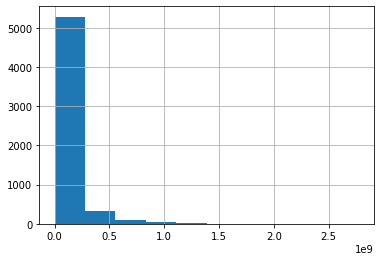

In [14]:
budgetdf['worldwide_gross'].hist()

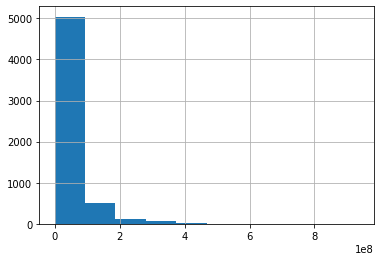

In [15]:
budgetdf['domestic_gross'].hist()

# Making a column for age and decades

In [16]:
budgetdf['age'] = 2020 - budgetdf['year_released']

# Making a Column for day and month

In [17]:
import datetime as dt
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
budgetdf['day'] = budgetdf['release_date'].dt.dayofweek.map(dayOfWeek)

In [18]:
budgetdf['daynumber'] = budgetdf['release_date'].dt.dayofweek

In [19]:
#Monthk={1:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
budgetdf['month'] = pd.DatetimeIndex(budgetdf['release_date']).month

In [20]:
budgetdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,day,daynumber,month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,Friday,4,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,Friday,4,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,Friday,4,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,Friday,4,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,Friday,4,12


In [21]:
budgetdf['daynumber'].value_counts()

4    4539
2     621
1     290
3     172
0      59
5      56
6      45
Name: daynumber, dtype: int64

In [22]:
budgetdf['day'].value_counts()

Friday       4539
Wednesday     621
Tuesday       290
Thursday      172
Monday         59
Saturday       56
Sunday         45
Name: day, dtype: int64

In [23]:
budgetdf['month'].value_counts()

12    745
10    573
8     496
9     493
11    486
6     479
3     470
4     454
7     440
5     407
2     392
1     347
Name: month, dtype: int64

# Adding Columns for net profit, margins and markup

In [24]:
budgetdf['markup'] = ((budgetdf['worldwide_gross'] - budgetdf['production_budget'])/budgetdf['production_budget'])

In [25]:
budgetdf['profitmargin'] = ((budgetdf['worldwide_gross'] - budgetdf['production_budget'])/(budgetdf['worldwide_gross']))

In [26]:
budgetdf['netprofit'] = budgetdf['worldwide_gross'] - budgetdf['production_budget']

In [27]:
budgetdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,day,daynumber,month,markup,profitmargin,netprofit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,Friday,4,12,5.532577,0.846921,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,Friday,4,5,1.546673,0.607331,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,Friday,4,6,-0.572108,-1.337036,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,Friday,4,5,3.243841,0.764364,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,Friday,4,12,3.153696,0.759251,999721747


In [28]:
budgetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
year_released        5782 non-null int64
age                  5782 non-null int64
day                  5782 non-null object
daynumber            5782 non-null int64
month                5782 non-null int64
markup               5782 non-null float64
profitmargin         5782 non-null float64
netprofit            5782 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(9), object(2)
memory usage: 632.5+ KB


# Exporting to a new file

In [29]:
budgetdf.to_csv('../cleandata/movierevenue.csv')